In [ ]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

# Import Libraries

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_AllGenres.csv')
#print(data)

# Train Test Split
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train.shape)

# Neural Network

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1000/1000 [==============================] - 11s 10ms/step - loss: 0.3928 - accuracy: 0.8354 - precision: 0.4444 - recall: 0.0084
Epoch 2/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.3769 - accuracy: 0.8362 - precision: 0.5466 - recall: 0.0167
Epoch 3/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.3704 - accuracy: 0.8369 - precision: 0.5511 - recall: 0.0390
Epoch 4/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3630 - accuracy: 0.8364 - precision: 0.5190 - recall: 0.0546
Epoch 5/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3537 - accuracy: 0.8392 - precision: 0.5656 - recall: 0.0894
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3435 - accuracy: 0.8432 - precision: 0.5979 - recall: 0.1395
Epoch 7/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3305 - accuracy: 0.8472 - precision: 0.6100 - recall: 0.1941
Epoch 8/50
1000/1000 

# Perforomance + Plot Graph 

In [ ]:
predictions = model.predict(X_test_scaled)

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

print(confusion_matrix(y_test, prediction_classes))

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

250/250 [==============================] - 0s 2ms/step
[[6399  299]
 [ 362  940]]
Accuracy: 0.92
Precision: 0.76
Recall: 0.72


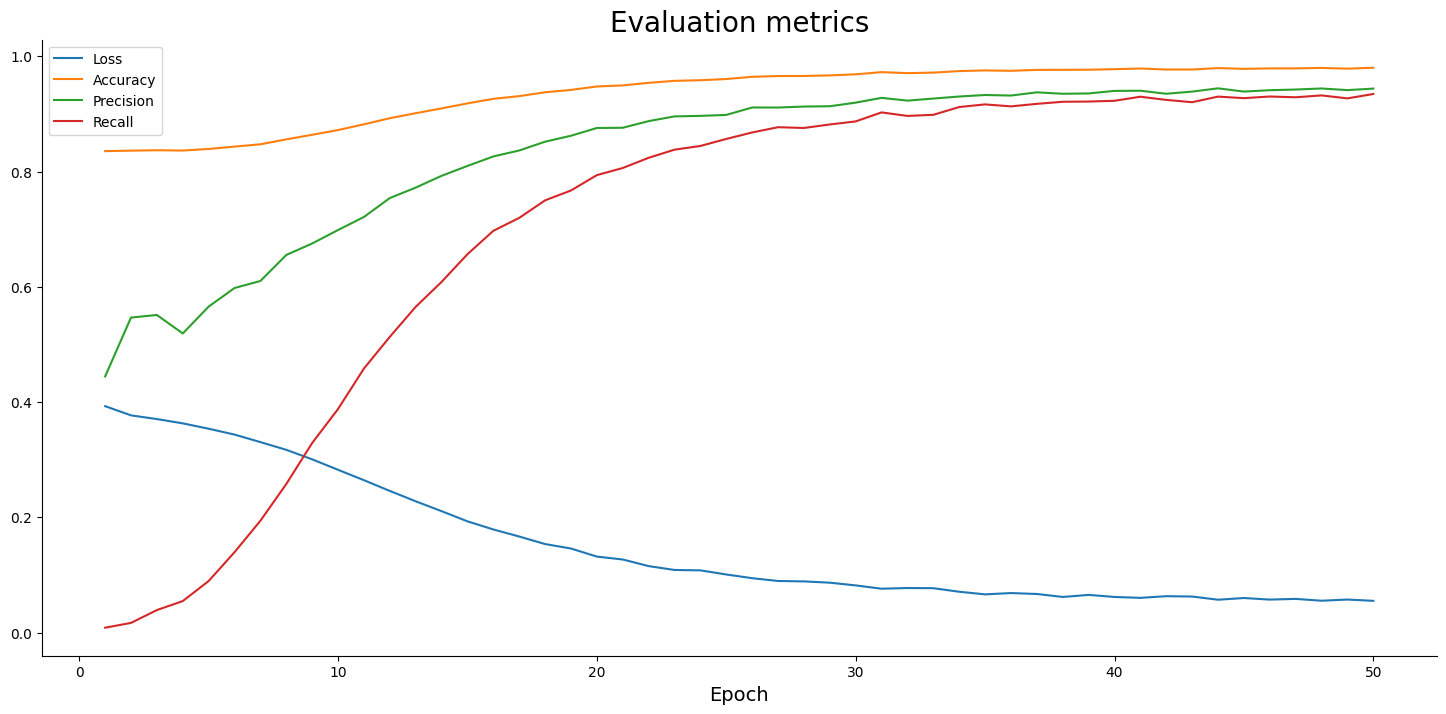

In [ ]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

# Old

In [ ]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
data = pd.read_csv('/content/drive/MyDrive/Spotify/SpotifyAPI_AllGenres.csv')
print(data)

       Unnamed: 0              name                   artist  genre  \
0               0         MARMALADE               MACKLEMORE      2   
1               1        NEW BUILDS           ARCHY MARSHALL      3   
2               2  MOTHER LIKE MINE           THE BAND PERRY      1   
3               3      STUCK WITH U            ARIANA GRANDE      2   
4               4            GENIUS                      SIA      2   
...           ...               ...                      ...    ...   
39995       39995            FAMOUS              ADAM DOLEAC      1   
39996       39996  BOYS 'ROUND HERE            BLAKE SHELTON      1   
39997       39997          FLY AWAY              TONES AND I      2   
39998       39998  SÍGUELO BAILANDO                    OZUNA      2   
39999       39999     LA CLEPTÓMANA  BUENA VISTA SOCIAL CLUB      3   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.922   0.583    5    -4.982     1       0.0753       

In [ ]:
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

In [ ]:
# Remove hit, name, artist
X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

In [ ]:
print(X_train.shape)

(32000, 13)


In [ ]:
#X_train = np.asarray(X_train).astype('float32').reshape((-1,1))
#X_test = np.asarray(X_test).astype('float32').reshape((-1,1))
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

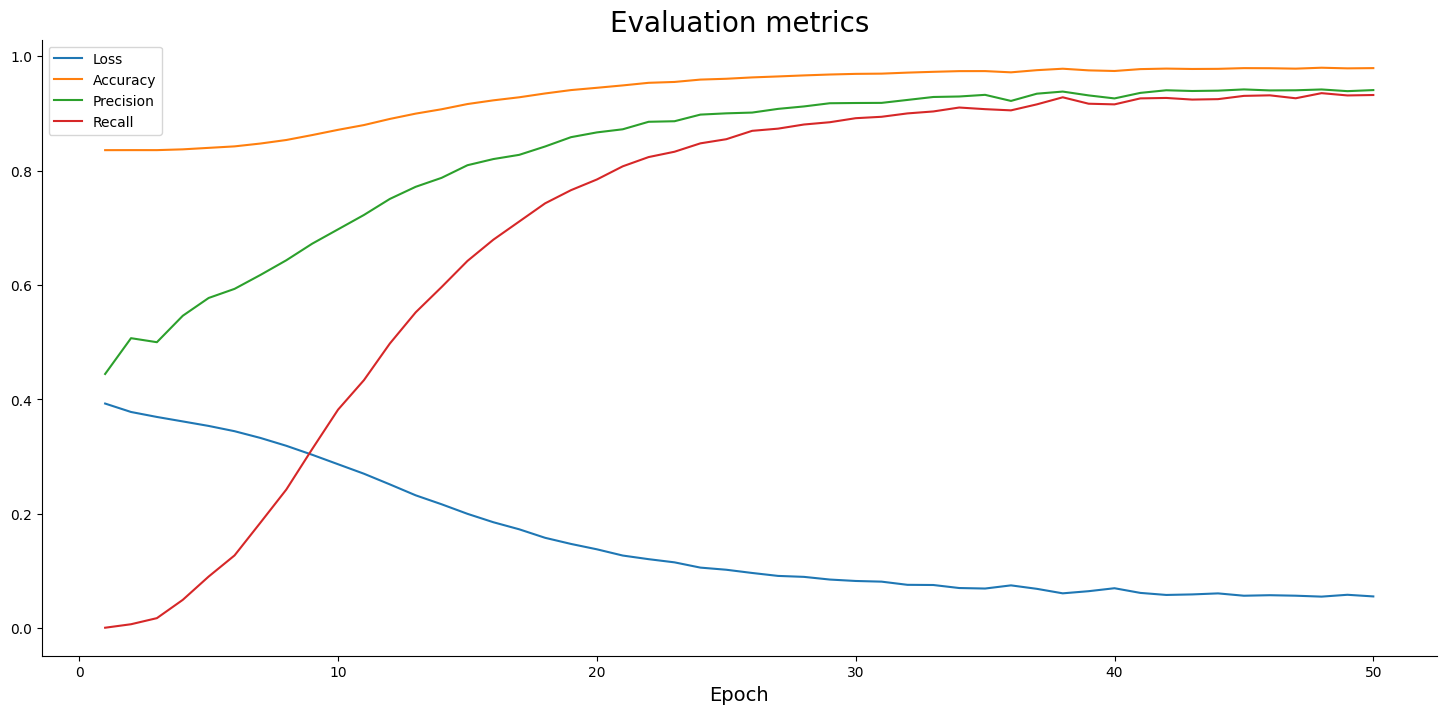

In [ ]:
import numpy as np
plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)


250/250 [==============================] - 0s 2ms/step


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[6360  335]
 [ 326  979]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.92
Precision: 0.75
Recall: 0.75


# Detection

In [ ]:
%pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import datetime

cid = 'cid'
secret = 'secret'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Collect user inputs
song = input("Enter a song to receive the probability that it is a hit: ").replace(" ", "%20")
artist = input("Enter the artist that performs this song: ").replace(" ", "%20")

# Query Spotify API for track ID
query = "remaster%20track:"+song+"%20artist:"+artist
result = sp.search(q=query, type="track", limit=1)

# Extract audio features from track ID
track_id = result['tracks']['items'][0]['id']
features = sp.audio_features(tracks=[track_id])[0]
feature_array = np.array([features['danceability'], features['energy'], features['key'], features['loudness'],
features['mode'], features['speechiness'], features['acousticness'], features['instrumentalness'],
features['liveness'], features['valence'], features['tempo'], features['duration_ms']])

# Scale features using StandardScaler from the training data
feature_array_scaled = scaler.transform([feature_array])

# Predict using the trained neural network
prediction = model.predict(feature_array_scaled)

# Print the probability that the song is a hit
print("The probability that this song is a hit is:", prediction[0][0])

Enter a song to receive the probability that it is a hit: drugs
Enter the artist that performs this song: EDEN


InvalidArgumentError: ignored

In [ ]:
song = input("Enter a song to receive the probability that it is a hit: ").replace(" ", "%20")
artist = input("Enter the artist that performs this song: ").replace(" ", "%20")

query = "remaster%20track:"+song+"%20artist:"+artist 
result = sp.search(q=query, type="track", limit=1)

track = result["tracks"]["items"][0]

ref_artist = track["artists"][0]["name"]
ref_track = track["name"]
correct_track = input("To verify, you are looking for "+ref_track+ " by "+ref_artist+". Is this correct? (enter Y/N)")

if correct_track == "Y":
  features = sp.audio_features(track["id"])[0]
  song_features = np.array([features["danceability"] , features["energy"], features["key"], features["loudness"], features["mode"], features["speechiness"], features["acousticness"], features["instrumentalness"], features["liveness"], features["valence"], features["tempo"], features["duration_ms"]])

  # Scale the song features
  scaler = StandardScaler()
  song_features_scaled = scaler.fit_transform(song_features.reshape(1, -1))

  # Predict the probability that the song is a hit
  hit_probability = model.predict(song_features_scaled)[0]

  print(f"The probability that {ref_track} by {ref_artist} is a hit is: {hit_probability}")


NameError: ignored

In [ ]:
print(X_test_scaled[0])

[-1.34249095  1.58907739  0.33629026 -1.18950413  0.2135388   0.75453283
  0.09717097  0.6944385  -0.4477475  -0.42699377  2.28570948  0.32140656
 -0.81551513]
